In [1]:
from processed_image import ProcessedImage, read_from_dir, show_image_strip
imgs = list(read_from_dir('..\\Data\\LittleCarDb1'))
[str(img) for img in imgs[0:5]]

['ProcessedImage for ..\\Data\\LittleCarDb1\\SF0781-001_1.jpg (0 in cache)',
 'ProcessedImage for ..\\Data\\LittleCarDb1\\SF0781-002_1.jpg (0 in cache)',
 'ProcessedImage for ..\\Data\\LittleCarDb1\\SF0781-003_1.jpg (0 in cache)',
 'ProcessedImage for ..\\Data\\LittleCarDb1\\SF0781-004_1.jpg (0 in cache)',
 'ProcessedImage for ..\\Data\\LittleCarDb1\\SF0781-005_1.jpg (0 in cache)']

Using TensorFlow backend.


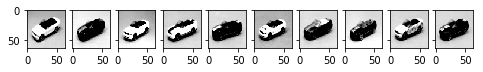

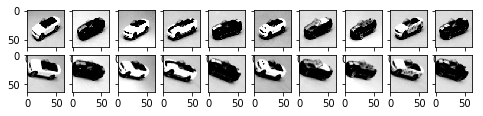

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator()

def transform(params, img):
    img = np.reshape(img, (img.shape[0], img.shape[1], 1))
    xformed = datagen.apply_transform(x=img,
                                      transform_parameters=params)
    xformed = np.reshape(xformed, (xformed.shape[0], xformed.shape[1]))
    return xformed

transform_parameters = {
    'theta':40,
    'tx':5.0,
    'ty':5.0,
    'zx':0.9,
    'zy':0.9
}

_, axes = plt.subplots(1, 10, sharey=True, figsize=(8,1.5))
show_image_strip(imgs, axes)
show_processed_strip = True
if show_processed_strip:
    _, axes = plt.subplots(2, 10, sharey=True, figsize=(8,1.5))
    processed_dict = {img.fullpath:transform(transform_parameters, img.get_processed_image()) for img in imgs}
    show_image_strip(imgs, axes, predicted_dict=processed_dict)

In [3]:
use_cpu = False
if use_cpu:
    import os
    os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
    os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
from model_vae_3stage import ModelVae3Stage
all_model = ModelVae3Stage(size=256, in_channels=1, latent_dim=8)
vae, enc, dec = all_model.vae, all_model.encoder, all_model.decoder

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
import numpy as np
import random
random.shuffle(imgs)
x_train = [img.get_processed_image(size=256) for img in imgs]
x_train = np.array(x_train)
x_train = np.reshape(x_train, 
                     (x_train.shape[0], 
                      x_train.shape[1], 
                      x_train.shape[2], 1))

test_size = len(x_train) // 10
x_test = x_train[0:test_size]
x_train = x_train[test_size+1:]
x_train.shape, x_test.shape

((579, 256, 256, 1), (64, 256, 256, 1))

In [49]:
use_generator = True
if use_generator:
    def generator(x_train, batch_size):
        # Create empty arrays to contain batch of features and labels
        batch_train = np.zeros((batch_size, 
                                x_train.shape[1], 
                                x_train.shape[2], 
                                x_train.shape[3]))
        while True:
            for i in range(batch_size):
                # choose random index in features
                batch_train[i] = random.choice(x_train)
            yield batch_train, batch_train
    vae.fit_generator(generator(x_train, batch_size=256), 
                      steps_per_epoch=50, epochs=500)
else:
    vae.fit(x_train, x_train, epochs=500, batch_size=256,
        shuffle=True, validation_data=(x_test,x_test))

Epoch 1/500
50/50 [==============================] - 31s 621ms/step - loss: 857.9989
Epoch 2/500
50/50 [==============================] - 31s 616ms/step - loss: 700.7073
Epoch 3/500
50/50 [==============================] - 31s 619ms/step - loss: 689.3873
Epoch 4/500
50/50 [==============================] - 31s 618ms/step - loss: 751.5618
Epoch 5/500
50/50 [==============================] - 31s 620ms/step - loss: 712.0245
Epoch 6/500
50/50 [==============================] - 31s 622ms/step - loss: 737.4613
Epoch 7/500
50/50 [==============================] - 31s 623ms/step - loss: 719.0778
Epoch 8/500
50/50 [==============================] - 31s 628ms/step - loss: 726.0875
Epoch 9/500
50/50 [==============================] - 31s 626ms/step - loss: 735.3242
Epoch 10/500
50/50 [==============================] - 31s 626ms/step - loss: 739.6090
Epoch 11/500
50/50 [==============================] - 31s 623ms/step - loss: 743.1174
Epoch 12/500
50/50 [==============================] - 31s 624ms

50/50 [==============================] - 31s 623ms/step - loss: 743.8208
Epoch 191/500
50/50 [==============================] - 31s 624ms/step - loss: 740.0375
Epoch 192/500
50/50 [==============================] - 31s 622ms/step - loss: 863.7011
Epoch 193/500
50/50 [==============================] - 31s 622ms/step - loss: 723.0528
Epoch 194/500
50/50 [==============================] - 31s 619ms/step - loss: 720.3791
Epoch 195/500
50/50 [==============================] - 31s 620ms/step - loss: 750.5551
Epoch 196/500
50/50 [==============================] - 31s 621ms/step - loss: 718.0669
Epoch 197/500
50/50 [==============================] - 31s 620ms/step - loss: 722.4274
Epoch 198/500
50/50 [==============================] - 31s 624ms/step - loss: 720.3721
Epoch 199/500
50/50 [==============================] - 31s 624ms/step - loss: 731.9194
Epoch 200/500
50/50 [==============================] - 31s 619ms/step - loss: 718.9461
Epoch 201/500
50/50 [==============================] - 31

50/50 [==============================] - 31s 617ms/step - loss: 727.4877
Epoch 379/500
50/50 [==============================] - 31s 618ms/step - loss: 710.6232
Epoch 380/500
50/50 [==============================] - 31s 620ms/step - loss: 755.8844
Epoch 381/500
50/50 [==============================] - 31s 616ms/step - loss: 731.7737
Epoch 382/500
50/50 [==============================] - 31s 617ms/step - loss: 719.8039
Epoch 383/500
50/50 [==============================] - 31s 614ms/step - loss: 734.4357
Epoch 384/500
50/50 [==============================] - 31s 617ms/step - loss: 749.1612
Epoch 385/500
50/50 [==============================] - 31s 614ms/step - loss: 737.1319
Epoch 386/500
50/50 [==============================] - 31s 617ms/step - loss: 721.2097
Epoch 387/500
50/50 [==============================] - 31s 619ms/step - loss: 753.5084
Epoch 388/500
50/50 [==============================] - 31s 618ms/step - loss: 714.3386
Epoch 389/500
50/50 [==============================] - 31

In [46]:
def show_original_decoded(original, decoded, sz):
    from scipy import ndimage, misc
    from skimage.transform import resize
    
    n = 8  # how many digits we will display
    plt.figure(figsize=(n*2, 4))
    for i in range(n):
        
        ax = plt.subplot(2, n, i+1)
        orig_image = original[i].reshape(sz,sz)
        plt.imshow(orig_image, cmap='gray')
        
        ax = plt.subplot(2, n, i+1+n)
        decoded_image = decoded[i].reshape(sz,sz)
        plt.imshow(decoded_image, cmap='gray')
    plt.show()

(8, 256, 256, 1) -> (8, 8) -> (8, 256, 256, 1)


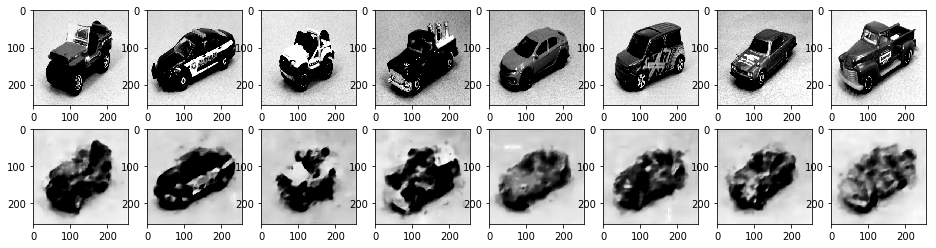

In [52]:
show_examples = np.append(x_train[0:4], x_test[0:4], axis=0)
encoded_latent = enc.predict(show_examples)[2]   # z parameter is #2
decoded_imgs = dec.predict(encoded_latent)
print(show_examples.shape, '->', encoded_latent.shape, '->', decoded_imgs.shape)
show_original_decoded(show_examples, decoded_imgs, 256)

In [33]:
vae.save('model_vae_3stage.h5')

In [34]:
with open("model_vae_3stage.yaml", "w") as yaml_model_file:
    yaml_model_file.write(vae.to_yaml())

In [35]:
import matplotlib.pyplot as plt
sz=256
def g(**kwargs):
    plt.figure(2, figsize=(4,4))
    # x = np.linspace(-10,10,num=1000)
    # plt.plot(x,kwargs['1']/100*x + kwargs['2'])
    # plt.ylim(-5,5)
    # plt.show()
    latent = np.array([list(kwargs.values())])
    # print(type(latent))
    # print(latent.shape)
    # latent.reshape(1,)
    # print(latent)
    decoded = dec.predict(latent)
    plt.imshow(decoded.reshape(sz,sz))
    plt.gray()
    return kwargs['1']

In [36]:
from ipywidgets import interactive_output,Layout
import ipywidgets as widgets

In [53]:
%matplotlib inline
latent_dim = encoded_latent[2].shape[-1]
def createSlider():
    return widgets.FloatSlider(value=0,
                               min=-1, max=1, step=0.01,
                               orientation='vertical',
                               layout=Layout(padding='0%'))
kwargs = {str(k):createSlider() for k in range(latent_dim)}
w = interactive_output(g,kwargs)
hbox = widgets.HBox(list(kwargs.values()),
                    layout=Layout(padding='0%'))
display(hbox,w)

Output()